In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Data/online_retail_II.xlsx'

In [4]:
train_data = pd.read_excel(file_path, sheet_name= 'Year 2009-2010')
test_data = pd.read_excel(file_path, sheet_name= 'Year 2010-2011')

In [5]:
print(train_data.head())
print(train_data.shape)
print(train_data.info())
print(train_data.describe())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
(525461, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----       

In [6]:
train_data = train_data.dropna(how='any')
train_data = train_data.drop_duplicates()
train_data = train_data[(train_data['Quantity']>0) & (train_data['Price']>0)]
train_data.shape

(400916, 8)

In [7]:
print(train_data.head())
print(train_data.shape)
print(train_data.info())
print(train_data.describe())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
(400916, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 400916 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0

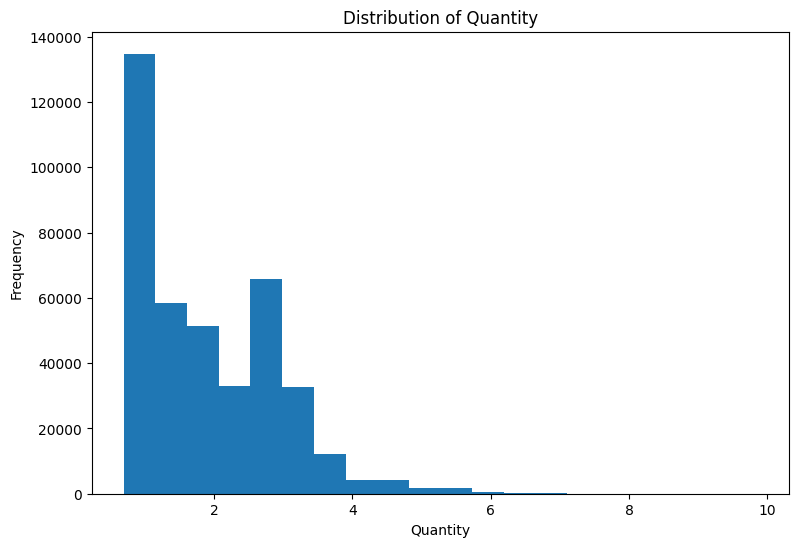

In [8]:
plt.figure(figsize=(9,6))
plt.hist(np.log1p(train_data['Quantity']),bins=20)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

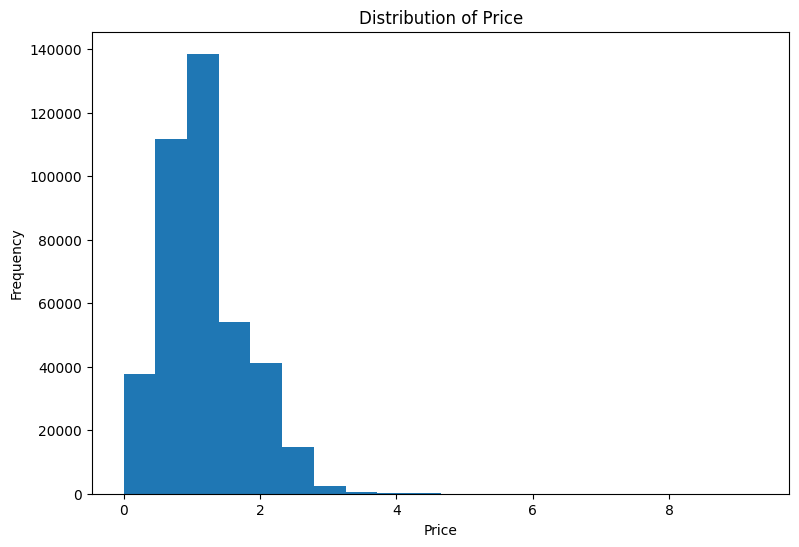

In [9]:
plt.figure(figsize=(9,6))
plt.hist(np.log1p(train_data['Price']),bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [10]:
train_data['Total_Price'] = train_data['Quantity']*train_data['Price']

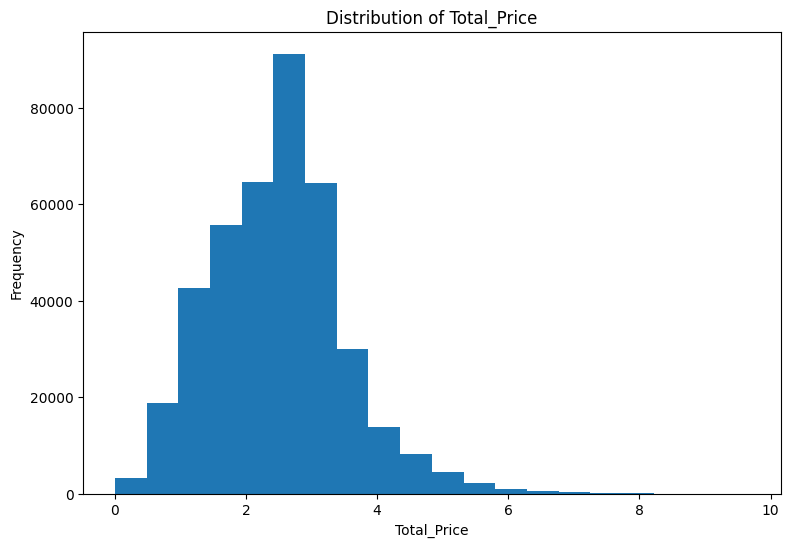

In [11]:
plt.figure(figsize=(9,6))
plt.hist(np.log1p(train_data['Total_Price']),bins=20)
plt.xlabel('Total_Price')
plt.ylabel('Frequency')
plt.title('Distribution of Total_Price')
plt.show()

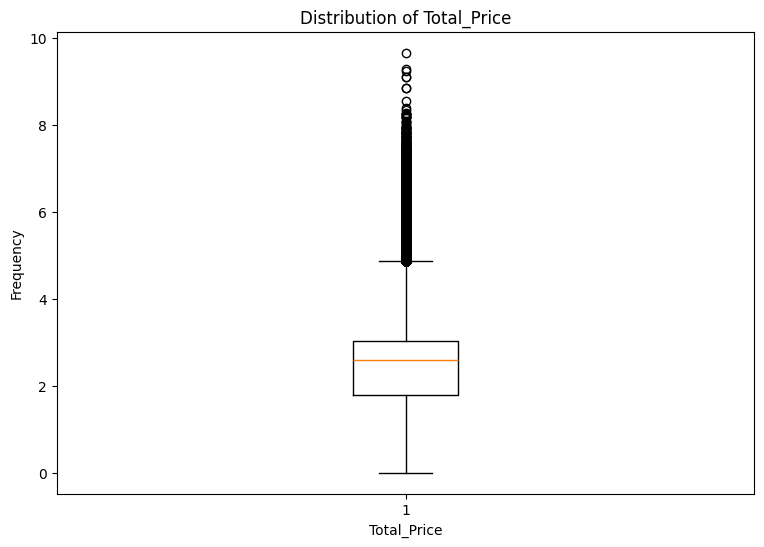

In [12]:
plt.figure(figsize=(9,6))
plt.boxplot(np.log1p(train_data['Total_Price']))
plt.xlabel('Total_Price')
plt.ylabel('Frequency')
plt.title('Distribution of Total_Price')
plt.show()

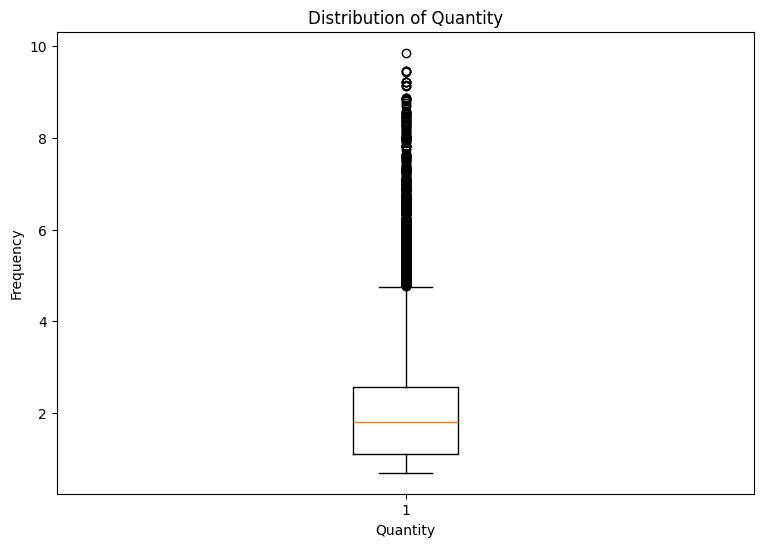

In [13]:
plt.figure(figsize=(9,6))
plt.boxplot(np.log1p(train_data['Quantity']))
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

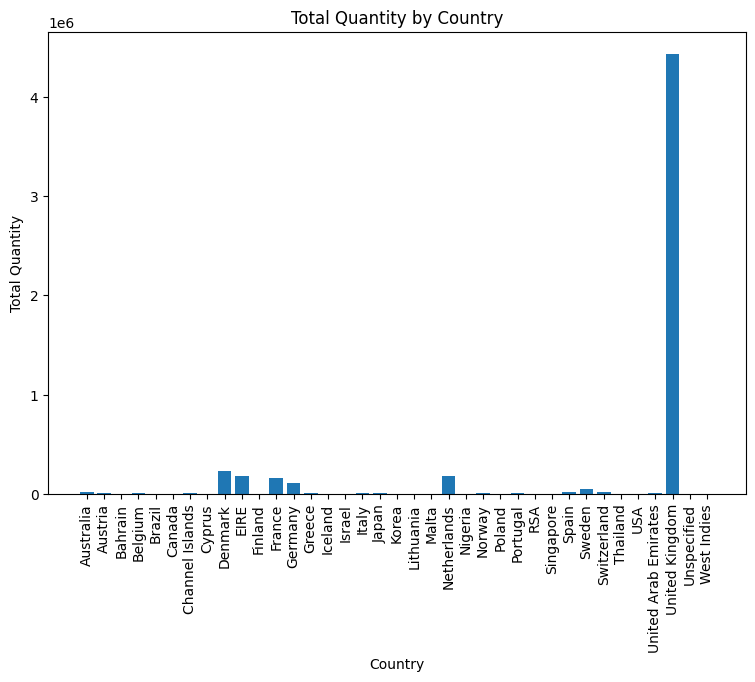

In [14]:
plt.figure(figsize=(9,6))
temp1 = train_data.groupby('Country')['Quantity'].sum().reset_index()
plt.bar(temp1['Country'],temp1['Quantity'])
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Country')
plt.xticks(rotation=90)
plt.show()

In [15]:
#FEATURE ENGINEERING

train_data['InvoiceDate_Only'] = train_data['InvoiceDate'].dt.date
snap_date = train_data['InvoiceDate_Only'].max() + pd.Timedelta(days=1)
snap_date

datetime.date(2010, 12, 10)

In [16]:
RFM = train_data.groupby('Customer ID').agg(
    {
        'InvoiceDate_Only': lambda x: (snap_date - x.max()).days,
        'Invoice': 'nunique',
        'Total_Price': 'sum'
    }).reset_index()
RFM.columns = ['Customer ID', 'Recency','Frequency','Monetary']
RFM.head()
print(RFM.describe())

        Customer ID      Recency    Frequency       Monetary
count   4312.000000  4312.000000  4312.000000    4312.000000
mean   15349.290353    91.172542     4.455705    2040.406712
std     1701.200176    96.861457     8.170213    8911.755977
min    12346.000000     1.000000     1.000000       2.950000
25%    13882.500000    18.000000     1.000000     307.187500
50%    15350.500000    53.000000     2.000000     701.615000
75%    16834.250000   136.000000     5.000000    1714.932500
max    18287.000000   374.000000   205.000000  349164.350000


In [17]:
RFM['R_rank'] = RFM['Recency'].rank(method='max',ascending='True')
RFM['F_rank'] = RFM['Frequency'].rank(method='max', ascending='False')
RFM['M_rank'] = RFM['Monetary'].rank(method='max', ascending='False')

RFM['R_norm'] = RFM['R_rank']/RFM['R_rank'].max()
RFM['F_norm'] = RFM['F_rank']/RFM['F_rank'].max()
RFM['M_norm'] = RFM['M_rank']/RFM['M_rank'].max()

RFM['RFM_Score'] = (RFM['R_norm']*0.33)  + (RFM['F_norm']*0.33) + (RFM['M_norm']*0.34)

In [18]:
RFM['RFM_Score'].describe()

count    4312.000000
mean        0.530118
std         0.141246
min         0.138680
25%         0.431000
50%         0.530487
75%         0.640238
max         0.944290
Name: RFM_Score, dtype: float64

In [19]:
RFM['Customer Segment'] =  RFM['RFM_Score'].apply(lambda x: 'Top Customers' if x > 0.90 else 'High Value Customers' if x > 0.75 else 'Medium Value Customers' if x > 0.5 else 'Low Value Customers' if x > 0.32 else ' Lost Customers' )


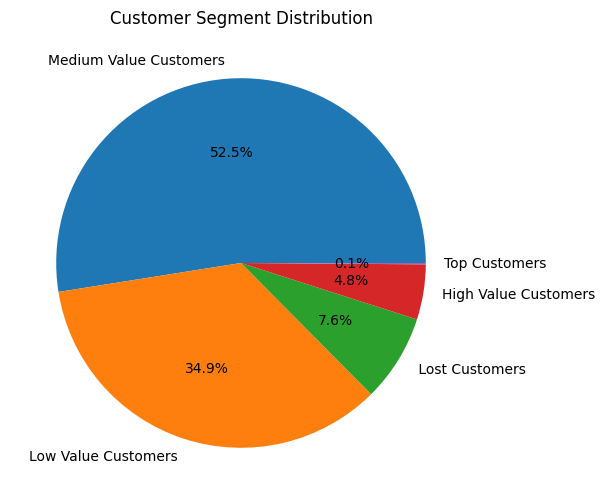

In [20]:
plt.figure(figsize=(9,6))
plt.pie(RFM['Customer Segment'].value_counts(), labels=RFM['Customer Segment'].value_counts().index, autopct='%1.1f%%')
plt.title('Customer Segment Distribution')
plt.show()

In [21]:
RFM.head()

Customer ID  Recency  Frequency  Monetary  R_rank  F_rank  M_rank  \
0      12346.0      165         11    372.86  3405.0  4027.0  1352.0   
1      12347.0        3          2   1323.32   248.0  2229.0  2929.0   
2      12348.0       74          1    222.16  2687.0  1419.0   735.0   
3      12349.0       43          3   2671.14  1917.0  2754.0  3659.0   
4      12351.0       11          1    300.93   709.0  1419.0  1048.0   

     R_norm    F_norm    M_norm  RFM_Score        Customer Segment  
0  0.789657  0.933905  0.313544   0.675380  Medium Value Customers  
1  0.057514  0.516929  0.679267   0.420517     Low Value Customers  
2  0.623145  0.329082  0.170455   0.372189     Low Value Customers  
3  0.444573  0.638683  0.848562   0.645986  Medium Value Customers  
4  0.164425  0.329082  0.243043   0.245492          Lost Customers

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [23]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(RFM[['Recency','Frequency','Monetary']])

In [24]:
pca_model = PCA(n_components=2)
rfm_PCA = pca_model.fit_transform(rfm_scaled)

In [25]:
print("Explained Variance by PCA Components:", pca_model.explained_variance_ratio_)

Explained Variance by PCA Components: [0.58252111 0.30707231]


In [26]:
rfm_PCA = pd.DataFrame(rfm_PCA, columns=['PCA1','PCA2'])
rfm_PCA.head()

PCA1      PCA2
0  0.171106  0.752200
1  0.045012 -0.915082
2 -0.362526 -0.289662
3  0.089846 -0.462998
4 -0.140669 -0.892921

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

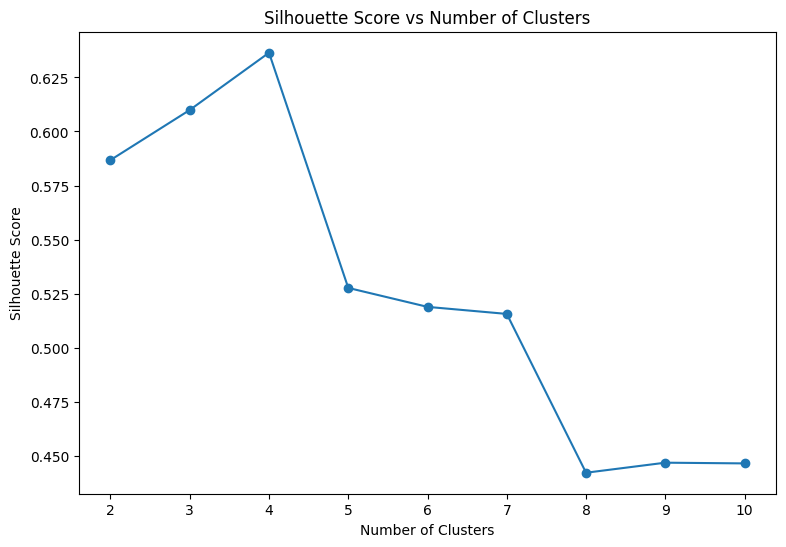

In [28]:
silhouette_scores = []
interias = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(rfm_PCA)
  interias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(rfm_PCA, kmeans.labels_))
silhouette_scores

plt.figure(figsize=(9,6))
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

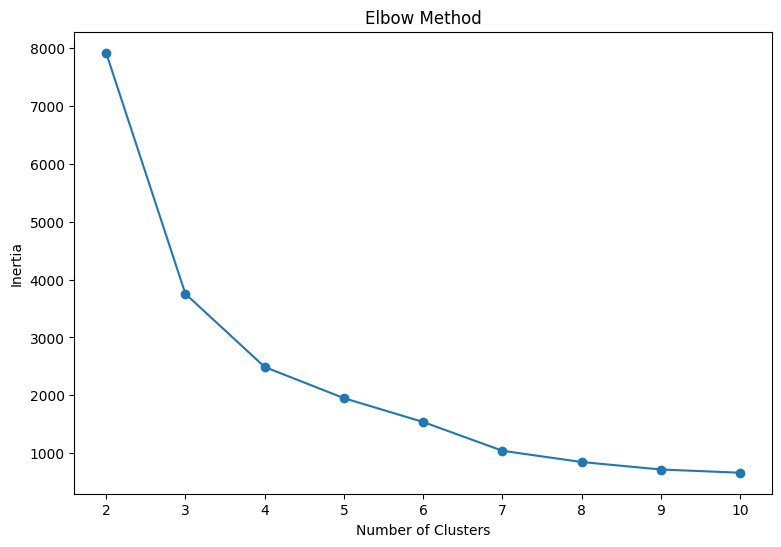

In [29]:
#ELBOW METHOD
plt.figure(figsize=((9,6)))
plt.plot(range(2,11), interias,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



In [30]:
baseline_model = KMeans(n_clusters=4, random_state=42)
baseline_model.fit(rfm_PCA)
print(silhouette_score(rfm_PCA, baseline_model.labels_))

0.6364334357318018


<Axes: xlabel='PCA1', ylabel='PCA2'>

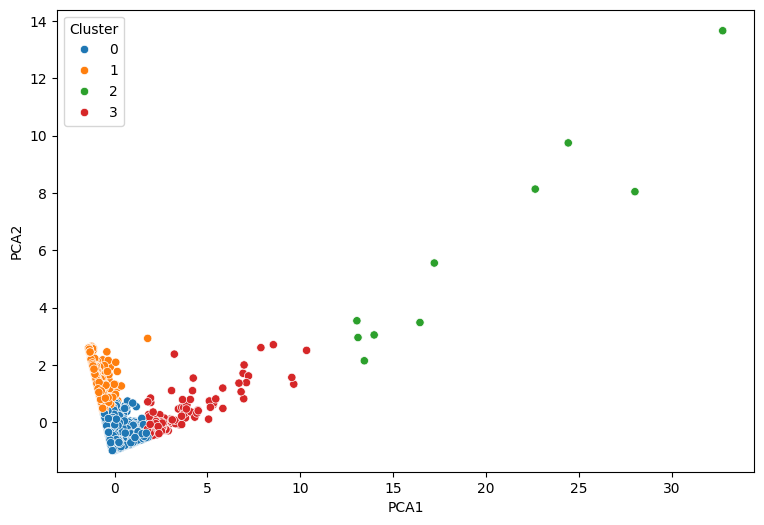

In [31]:
import seaborn as sns
rfm_PCA['Cluster'] = baseline_model.labels_
plt.figure(figsize=(9,6))
sns.scatterplot(data=rfm_PCA, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')

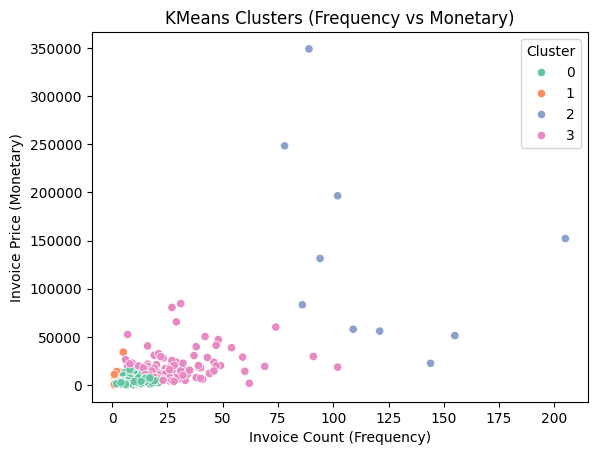

In [32]:
RFM['Cluster'] = baseline_model.labels_  # map this using the original RFM index

sns.scatterplot(data=RFM, x='Frequency', y='Monetary', hue='Cluster', palette='Set2')
plt.title('KMeans Clusters (Frequency vs Monetary)')
plt.xlabel('Invoice Count (Frequency)')
plt.ylabel('Invoice Price (Monetary)')
plt.show()

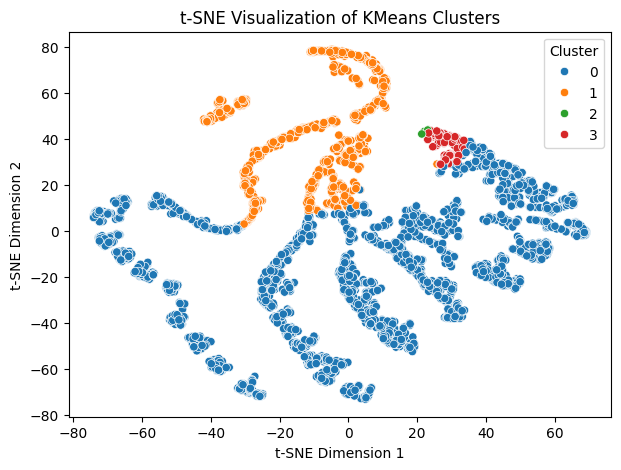

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
rfm_tsne = tsne.fit_transform(rfm_scaled)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(rfm_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = baseline_model.labels_

# Corrected plot using t-SNE components
plt.figure(figsize=(7,5))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10')
plt.title('t-SNE Visualization of KMeans Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

   k  silhouette_score        cv  \
0  3          0.641114  0.939250   
1  4          0.693319  1.164861   

                                              labels  
0  [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...  
1  [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...  


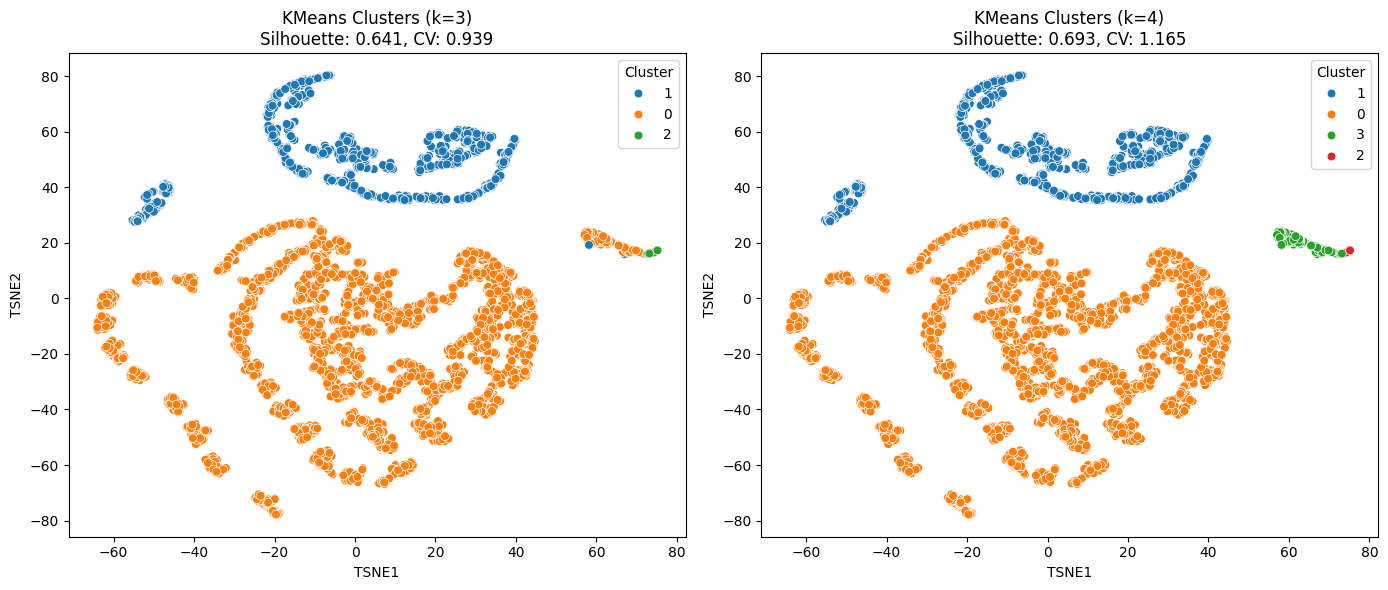

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

results = []

for k in [3, 4]:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(rfm_PCA)

    # Silhouette score
    sil_score = silhouette_score(rfm_PCA, labels)

    # Cluster sizes and CV
    unique, counts = np.unique(labels, return_counts=True)
    cv = np.std(counts) / np.mean(counts)

    # Save results
    results.append({
        "k": k,
        "silhouette_score": sil_score,
        "cv": cv,
        "labels": labels
    })

# Convert results to dataframe for easy viewing
results_df = pd.DataFrame(results)
print(results_df)

# Compute t-SNE embeddings once
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(rfm_PCA)

# Plot the clusters for k=3 and k=4
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for idx, res in enumerate(results):
    df_plot = pd.DataFrame({
        'TSNE1': tsne_result[:, 0],
        'TSNE2': tsne_result[:, 1],
        'Cluster': res['labels'].astype(str)
    })
    sns.scatterplot(data=df_plot, x='TSNE1', y='TSNE2', hue='Cluster', ax=axes[idx], palette='tab10', s=40)
    axes[idx].set_title(f'KMeans Clusters (k={res["k"]})\nSilhouette: {res["silhouette_score"]:.3f}, CV: {res["cv"]:.3f}')
    axes[idx].legend(title='Cluster')

plt.tight_layout()
plt.show()

In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

input_layer = Input(shape=(rfm_scaled.shape[1],))

# Encoder
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(3, activation='relu')(encoded)  # latent space

# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(rfm_scaled.shape[1], activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = autoencoder.fit(
    rfm_scaled, rfm_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.1,  # Add validation split
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.7624 - val_loss: 2.1672
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5521 - val_loss: 1.9091
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5013 - val_loss: 1.8296
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5571 - val_loss: 1.7689
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3971 - val_loss: 1.6538
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4892 - val_loss: 1.5233
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2261 - val_loss: 1.3667
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2660 - val_loss: 1.1956
Epoch 9/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1307 - val_loss: 1.0307
Epoch 10/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1270 - val_loss: 0.8803
Epoch 11/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1110 - val_loss: 0.7958
Epoch 12/100
122/122 ━━━━━━━━━━━━━━━━━━━

In [36]:
rfm_encoded = encoder.predict(rfm_scaled)

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [37]:
print(rfm_encoded.shape)
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for k in range(3, 9):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(rfm_encoded)
    score = silhouette_score(rfm_encoded, labels)
    print(f"GMM Silhouette Score for k={k}: {score:.3f}")

(4312, 3)
GMM Silhouette Score for k=3: 0.184
GMM Silhouette Score for k=4: 0.177
GMM Silhouette Score for k=5: 0.121
GMM Silhouette Score for k=6: 0.053
GMM Silhouette Score for k=7: 0.046
GMM Silhouette Score for k=8: 0.044


GMM k=2: Silhouette Score = 0.422, Cluster Sizes = {np.int64(0): np.int64(3565), np.int64(1): np.int64(747)}, CV = 0.654
GMM k=3: Silhouette Score = 0.184, Cluster Sizes = {np.int64(0): np.int64(1533), np.int64(1): np.int64(309), np.int64(2): np.int64(2470)}, CV = 0.616
GMM k=4: Silhouette Score = 0.177, Cluster Sizes = {np.int64(0): np.int64(1547), np.int64(1): np.int64(2), np.int64(2): np.int64(2401), np.int64(3): np.int64(362)}, CV = 0.885


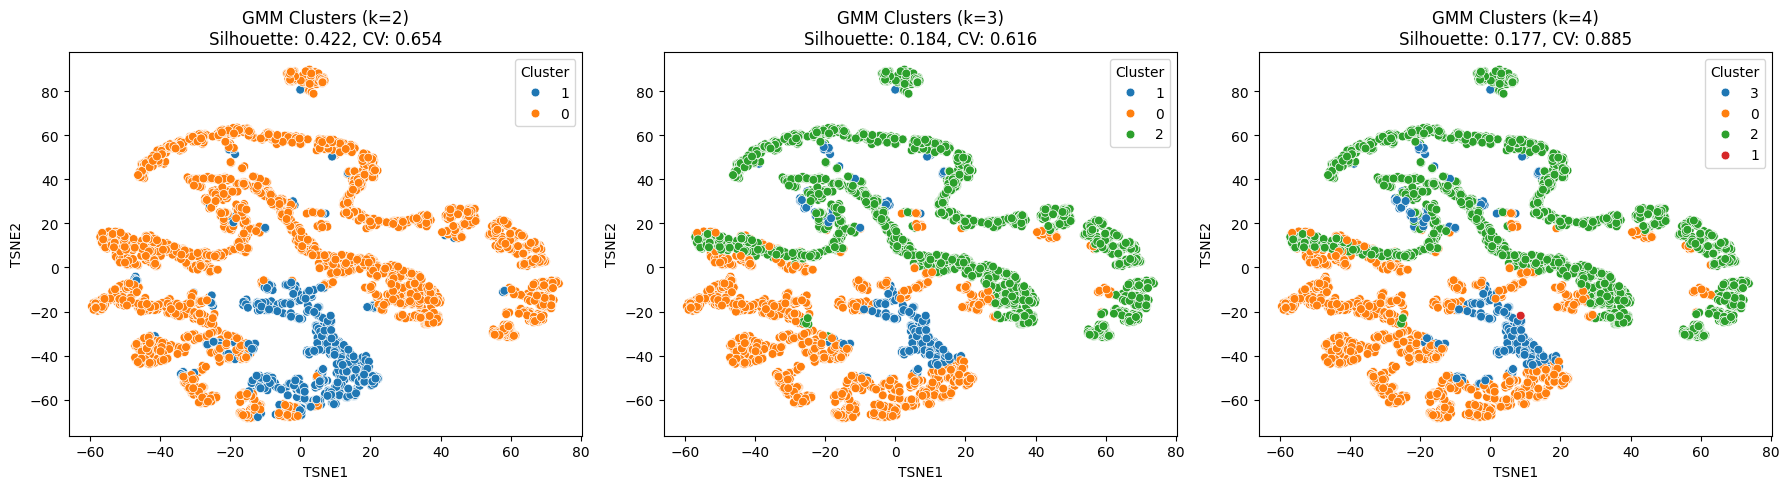

In [38]:

# Store results
results = []

for k in [2, 3, 4]:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(rfm_encoded)

    # Calculate silhouette score
    sil_score = silhouette_score(rfm_encoded, labels)

    # Cluster size counts
    unique, counts = np.unique(labels, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))

    # Calculate Coefficient of Variation (CV)
    counts_array = np.array(list(cluster_sizes.values()))
    cv = np.std(counts_array) / np.mean(counts_array)

    # Append results
    results.append({
        "k": k,
        "silhouette_score": sil_score,
        "cluster_sizes": cluster_sizes,
        "cv": cv,
        "labels": labels
    })

    print(f"GMM k={k}: Silhouette Score = {sil_score:.3f}, Cluster Sizes = {cluster_sizes}, CV = {cv:.3f}")

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(rfm_encoded)

# Plot clusters for each k
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, res in enumerate(results):
    df_plot = pd.DataFrame({
        'TSNE1': tsne_result[:, 0],
        'TSNE2': tsne_result[:, 1],
        'Cluster': res['labels'].astype(str)
    })
    sns.scatterplot(data=df_plot, x='TSNE1', y='TSNE2', hue='Cluster', ax=axes[idx], palette='tab10', s=40)
    axes[idx].set_title(f'GMM Clusters (k={res["k"]})\nSilhouette: {res["silhouette_score"]:.3f}, CV: {res["cv"]:.3f}')
    axes[idx].legend(title='Cluster')
plt.tight_layout()
plt.show()

Top 10 DBSCAN hyperparameter combos:
   eps  min_samples  silhouette_score          cluster_sizes        cv  \
0  2.5            3          0.915167        {0: 4301, 1: 4}  0.998142   
1  1.0            5          0.818650        {0: 4286, 1: 4}  0.998135   
2  1.0            4          0.816653        {0: 4286, 1: 5}  0.997670   
3  0.5            4          0.562478  {0: 4266, 1: 4, 2: 4}  1.410243   
4  0.5            3          0.543878  {0: 4267, 1: 5, 2: 5}  1.409254   

                                              labels  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  


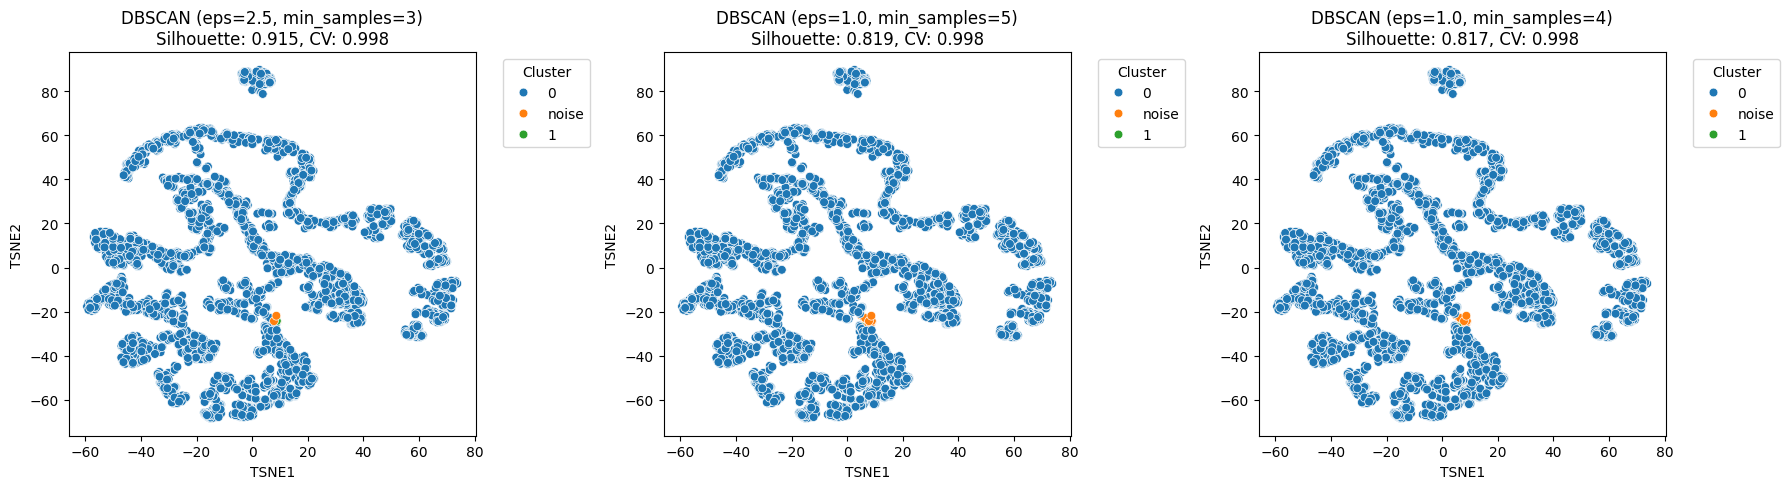

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# Define ranges of DBSCAN parameters to try
eps_values = np.arange(0.5, 5.1, 0.5)   # eps from 0.5 to 5.0 in steps of 0.5
min_samples_values = range(3, 11)       # min_samples from 3 to 10

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(rfm_encoded)

        # Ignore cases with only 1 cluster or all noise (-1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        # Relaxing the cluster count requirement slightly for potential matches
        if n_clusters < 2: # Change condition to require at least 2 non-noise clusters
            continue

        # Silhouette score (ignoring noise)
        try:
            mask = labels != -1
            if np.sum(mask) < 2 or len(np.unique(labels[mask])) < 2: # Ensure at least 2 points in at least 2 non-noise clusters
                 sil_score = np.nan
            else:
                sil_score = silhouette_score(rfm_encoded[mask], labels[mask])
        except Exception as e: # Catch potential errors during silhouette score calculation
            print(f"Error calculating silhouette for eps={eps}, min_samples={min_samples}: {e}")
            sil_score = np.nan


        # Cluster sizes (excluding noise)
        labels_no_noise = labels[mask]
        unique, counts = np.unique(labels_no_noise, return_counts=True)
        cluster_sizes = dict(zip(unique, counts))

        # Coefficient of Variation for cluster sizes
        sizes = np.array(list(cluster_sizes.values()))
        cv = sizes.std() / sizes.mean() if sizes.mean() > 0 and len(sizes) > 1 else np.nan # Ensure more than one cluster size for CV

        results.append({
            "eps": eps,
            "min_samples": min_samples,
            "silhouette_score": sil_score,
            "cluster_sizes": cluster_sizes,
            "cv": cv,
            "labels": labels
        })

# Convert results to DataFrame for easy filtering
df_results = pd.DataFrame(results).dropna(subset=['silhouette_score'])

# Add a check if df_results is empty
if df_results.empty:
    print("No valid DBSCAN parameter combinations found based on the criteria (at least 2 non-noise clusters and valid silhouette score). Consider adjusting eps_values, min_samples_values, or the cluster count threshold.")
else:
    # Sort by silhouette score descending and then by CV ascending for balanced clusters
    df_results = df_results.sort_values(by=['silhouette_score', 'cv'], ascending=[False, True]).reset_index(drop=True)

    print("Top 10 DBSCAN hyperparameter combos:")
    print(df_results.head(10))

    # t-SNE embedding for visualization (fit once)
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    tsne_result = tsne.fit_transform(rfm_encoded)

    # Plot top 3 DBSCAN clustering results
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    # Ensure we don't try to plot more rows than exist
    num_plots = min(3, len(df_results))

    for i in range(num_plots):
        row = df_results.iloc[i]
        # Mask noise points for plot clarity
        cluster_labels = row['labels'].copy()
        cluster_labels = np.where(cluster_labels == -1, 'noise', cluster_labels.astype(str))

        df_plot = pd.DataFrame({
            'TSNE1': tsne_result[:, 0],
            'TSNE2': tsne_result[:, 1],
            'Cluster': cluster_labels
        })

        sns.scatterplot(data=df_plot, x='TSNE1', y='TSNE2', hue='Cluster', ax=axes[i], palette='tab10', s=40, legend='full')
        axes[i].set_title(f"DBSCAN (eps={row['eps']}, min_samples={row['min_samples']})\nSilhouette: {row['silhouette_score']:.3f}, CV: {row['cv']:.3f}")
        axes[i].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2)

    # Hide any unused subplots
    for j in range(num_plots, 3):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


           Method   Linkage  Clusters (k)  Silhouette Score  Cluster Size CV
0   Agglomerative      ward             2          0.934314         0.993043
1   Agglomerative      ward             3          0.450667         0.890115
2   Agglomerative      ward             4          0.451230         1.178868
3   Agglomerative      ward             5          0.497232         1.174380
4   Agglomerative      ward             6          0.497465         1.361977
5   Agglomerative      ward             7          0.491003         1.522873
6   Agglomerative      ward             8          0.358125         1.109859
7   Agglomerative  complete             2          0.969571         0.999072
8   Agglomerative  complete             3          0.950933         1.411754
9   Agglomerative  complete             4          0.909394         1.726160
10  Agglomerative  complete             5          0.909187         1.993624
11  Agglomerative  complete             6          0.876156         2.226735

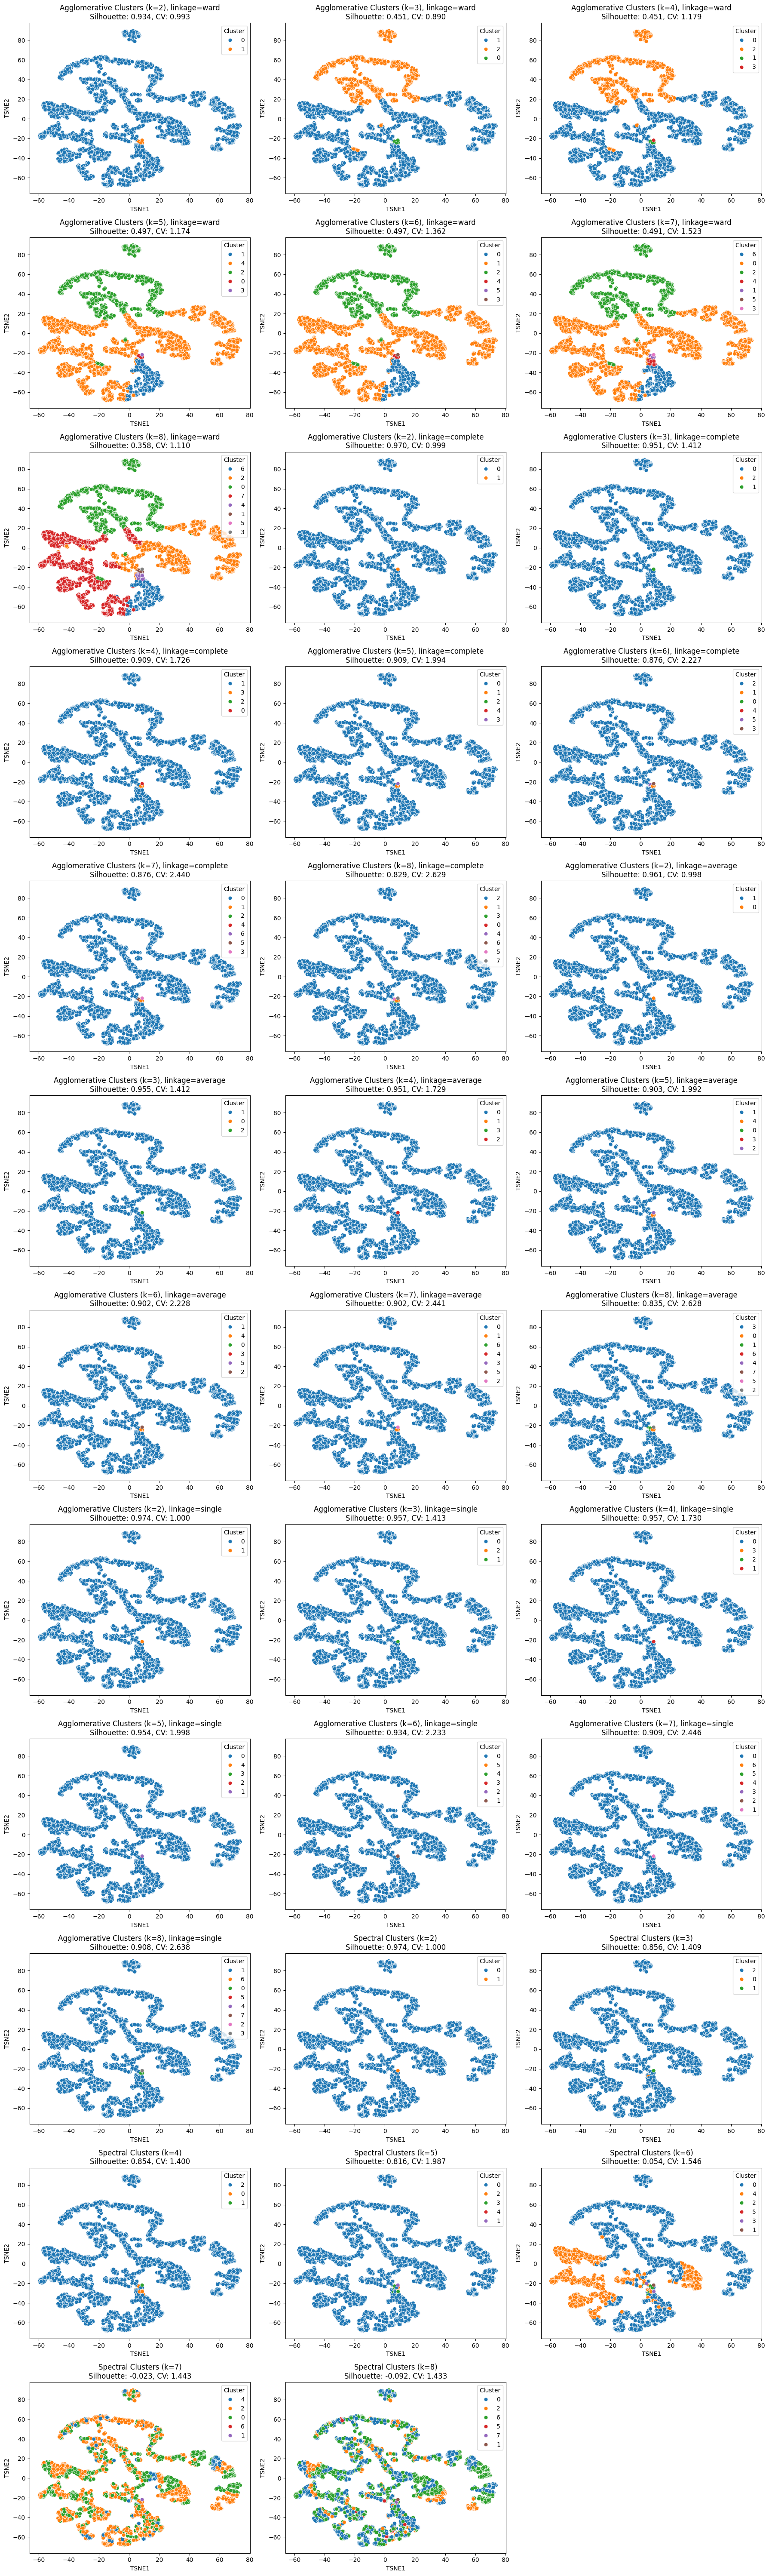

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# Run t-SNE once for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(rfm_encoded)

# Store all results
all_results = []

# Agglomerative clustering sweep
linkages = ['ward', 'complete', 'average', 'single']
cluster_range = range(2, 9)

for linkage in linkages:
    for k in cluster_range:
        # Skip ward linkage if incompatible
        if linkage == 'ward' and k > len(rfm_encoded):
            continue
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = model.fit_predict(rfm_encoded)
        sil_score = silhouette_score(rfm_encoded, labels)
        counts = np.bincount(labels)
        cv = np.std(counts) / np.mean(counts) if len(counts) > 1 else 0

        all_results.append({
            'method': 'Agglomerative',
            'linkage': linkage,
            'k': k,
            'silhouette_score': sil_score,
            'cv': cv,
            'labels': labels
        })

# Spectral clustering sweep
for k in cluster_range:
    model = SpectralClustering(n_clusters=k, random_state=42, assign_labels='kmeans')
    labels = model.fit_predict(rfm_encoded)
    sil_score = silhouette_score(rfm_encoded, labels)
    counts = np.bincount(labels)
    cv = np.std(counts) / np.mean(counts) if len(counts) > 1 else 0

    all_results.append({
        'method': 'Spectral',
        'k': k,
        'silhouette_score': sil_score,
        'cv': cv,
        'labels': labels
    })

# Print a summary table for all results
summary = []
for res in all_results:
    if res['method'] == 'Agglomerative':
        summary.append({
            'Method': res['method'],
            'Linkage': res['linkage'],
            'Clusters (k)': res['k'],
            'Silhouette Score': res['silhouette_score'],
            'Cluster Size CV': res['cv']
        })
    else:
        summary.append({
            'Method': res['method'],
            'Linkage': 'N/A',
            'Clusters (k)': res['k'],
            'Silhouette Score': res['silhouette_score'],
            'Cluster Size CV': res['cv']
        })
summary_df = pd.DataFrame(summary)
print(summary_df)

# Plot all clusterings
n_plots = len(all_results)
cols = 3
rows = n_plots // cols + (1 if n_plots % cols else 0)

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
axes = axes.flatten()

for idx, res in enumerate(all_results):
    df_plot = pd.DataFrame({
        'TSNE1': tsne_result[:, 0],
        'TSNE2': tsne_result[:, 1],
        'Cluster': res['labels'].astype(str)
    })
    sns.scatterplot(data=df_plot, x='TSNE1', y='TSNE2', hue='Cluster', ax=axes[idx], palette='tab10', s=40)
    title = f"{res['method']} Clusters (k={res['k']})"
    if res['method'] == 'Agglomerative':
        title += f", linkage={res['linkage']}"
    title += f"\nSilhouette: {res['silhouette_score']:.3f}, CV: {res['cv']:.3f}"
    axes[idx].set_title(title)
    axes[idx].legend(title='Cluster', loc='best')
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


   Clusters (k)  Silhouette Score  Cluster Size CV
0             3          0.450667         0.890115
1             4          0.451230         1.178868


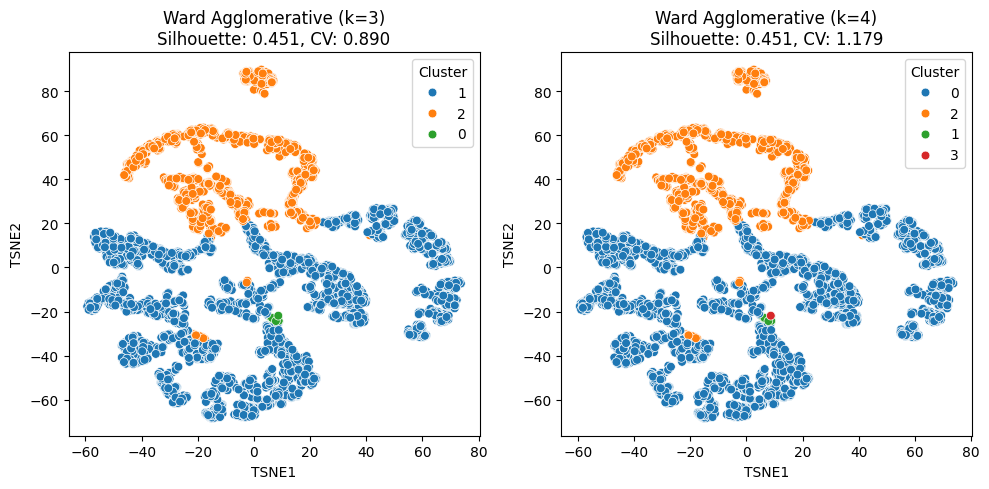

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# Run t-SNE once for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(rfm_encoded)

# Store results
results = []
cluster_range = range(3,5)

for k in cluster_range:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(rfm_encoded)
    sil_score = silhouette_score(rfm_encoded, labels)
    counts = np.bincount(labels)
    cv = np.std(counts) / np.mean(counts) if len(counts) > 1 else 0

    results.append({
        'k': k,
        'silhouette_score': sil_score,
        'cv': cv,
        'labels': labels
    })

# Print summary
summary_df = pd.DataFrame([{'Clusters (k)': r['k'], 'Silhouette Score': r['silhouette_score'], 'Cluster Size CV': r['cv']} for r in results])
print(summary_df)

# Plot all clusterings
fig, axes = plt.subplots(1, len(results), figsize=(5 * len(results), 5))
if len(results) == 1:
    axes = [axes]

for idx, res in enumerate(results):
    df_plot = pd.DataFrame({
        'TSNE1': tsne_result[:, 0],
        'TSNE2': tsne_result[:, 1],
        'Cluster': res['labels'].astype(str)
    })
    sns.scatterplot(data=df_plot, x='TSNE1', y='TSNE2', hue='Cluster', ax=axes[idx], palette='tab10', s=40)
    axes[idx].set_title(f'Ward Agglomerative (k={res["k"]})\nSilhouette: {res["silhouette_score"]:.3f}, CV: {res["cv"]:.3f}')
    axes[idx].legend(title='Cluster', loc='best')

plt.tight_layout()
plt.show()


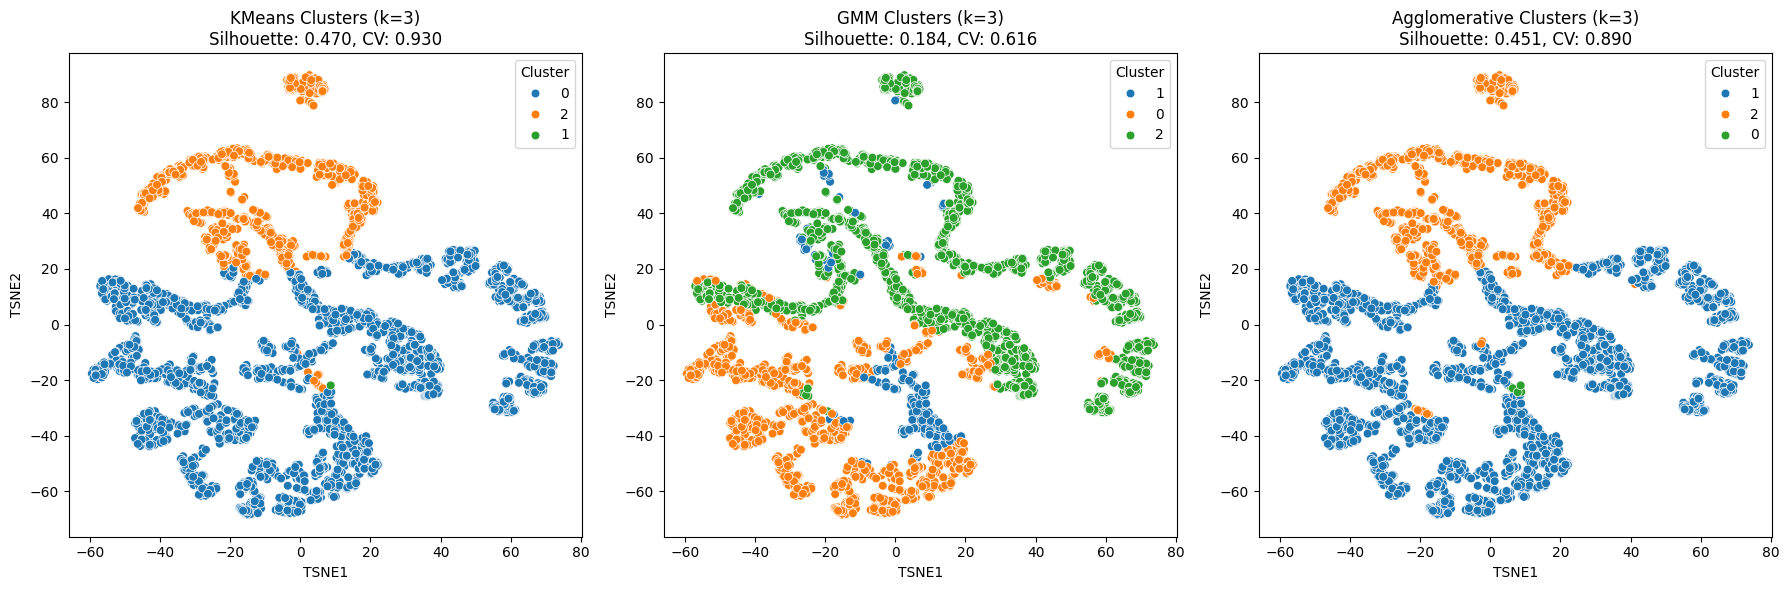

           Model  Silhouette Score  Cluster Size CV
0         KMeans          0.470451         0.930396
1            GMM          0.184159         0.615594
2  Agglomerative          0.450667         0.890115


In [43]:
#advanced model
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Models with k=3
k = 3

# KMeans
km = KMeans(n_clusters=k, random_state=42)
am_km_labels = km.fit_predict(rfm_encoded)
km_silhouette = silhouette_score(rfm_encoded, am_km_labels)
unique, counts = np.unique(am_km_labels, return_counts=True)
km_cv = np.std(counts) / np.mean(counts)

# GMM
gmm = GaussianMixture(n_components=k, random_state=42)
am_gmm_labels = gmm.fit_predict(rfm_encoded)
gmm_silhouette = silhouette_score(rfm_encoded, am_gmm_labels)
unique, counts = np.unique(am_gmm_labels, return_counts=True)
gmm_cv = np.std(counts) / np.mean(counts)

# Agglomerative (Ward linkage)
agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
am_agglo_labels = agglo.fit_predict(rfm_encoded)
agglo_silhouette = silhouette_score(rfm_encoded, am_agglo_labels)
unique, counts = np.unique(am_agglo_labels, return_counts=True)
agglo_cv = np.std(counts) / np.mean(counts)




# Prepare t-SNE embedding for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(rfm_encoded)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

models = [
    ('KMeans', am_km_labels, km_silhouette, km_cv),
    ('GMM', am_gmm_labels, gmm_silhouette, gmm_cv),
    ('Agglomerative', am_agglo_labels, agglo_silhouette, agglo_cv)
]

for idx, (name, labels, sil_score, cv) in enumerate(models):
    df_plot = pd.DataFrame({
        'TSNE1': tsne_result[:, 0],
        'TSNE2': tsne_result[:, 1],
        'Cluster': labels.astype(str)
    })
    sns.scatterplot(data=df_plot, x='TSNE1', y='TSNE2', hue='Cluster', ax=axes[idx], palette='tab10', s=40)
    axes[idx].set_title(f'{name} Clusters (k=3)\nSilhouette: {sil_score:.3f}, CV: {cv:.3f}')
    axes[idx].legend(title='Cluster')

plt.tight_layout()
plt.show()

# Summary dataframe
summary_df = pd.DataFrame({
    'Model': ['KMeans', 'GMM', 'Agglomerative'],
    'Silhouette Score': [km_silhouette, gmm_silhouette, agglo_silhouette],
    'Cluster Size CV': [km_cv, gmm_cv, agglo_cv]
})

print(summary_df)


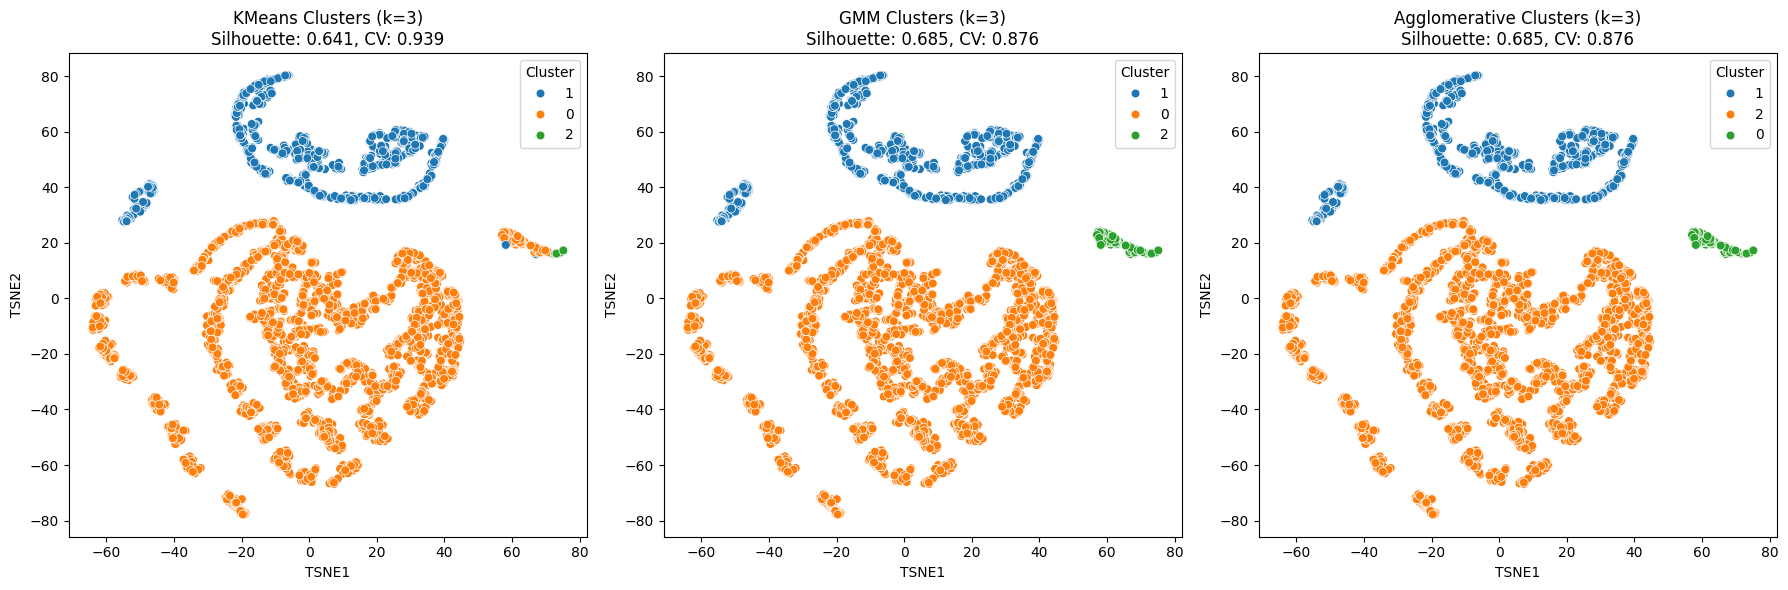

           Model  Silhouette Score  Cluster Size CV
0         KMeans          0.641114         0.939250
1            GMM          0.684887         0.876224
2  Agglomerative          0.684887         0.876224


In [44]:
#base line model
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Models with k=3
k = 3

# KMeans
km = KMeans(n_clusters=k, random_state=42)
bm_km_labels = km.fit_predict(rfm_PCA)
km_silhouette = silhouette_score(rfm_PCA, bm_km_labels)
unique, counts = np.unique(bm_km_labels, return_counts=True)
km_cv = np.std(counts) / np.mean(counts)

# GMM
gmm = GaussianMixture(n_components=k, random_state=42)
bm_gmm_labels = gmm.fit_predict(rfm_PCA)
gmm_silhouette = silhouette_score(rfm_PCA, bm_gmm_labels)
unique, counts = np.unique(bm_gmm_labels, return_counts=True)
gmm_cv = np.std(counts) / np.mean(counts)

# Agglomerative (Ward linkage)
agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
bm_agglo_labels = agglo.fit_predict(rfm_PCA)
agglo_silhouette = silhouette_score(rfm_PCA, bm_agglo_labels)
unique, counts = np.unique(bm_agglo_labels, return_counts=True)
agglo_cv = np.std(counts) / np.mean(counts)


# Prepare t-SNE embedding for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(rfm_PCA)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

models = [
    ('KMeans', bm_km_labels, km_silhouette, km_cv),
    ('GMM', bm_gmm_labels, gmm_silhouette, gmm_cv),
    ('Agglomerative', bm_agglo_labels, agglo_silhouette, agglo_cv)
]

for idx, (name, labels, sil_score, cv) in enumerate(models):
    df_plot = pd.DataFrame({
        'TSNE1': tsne_result[:, 0],
        'TSNE2': tsne_result[:, 1],
        'Cluster': labels.astype(str)
    })
    sns.scatterplot(data=df_plot, x='TSNE1', y='TSNE2', hue='Cluster', ax=axes[idx], palette='tab10', s=40)
    axes[idx].set_title(f'{name} Clusters (k=3)\nSilhouette: {sil_score:.3f}, CV: {cv:.3f}')
    axes[idx].legend(title='Cluster')

plt.tight_layout()
plt.show()

# Summary dataframe
summary_df = pd.DataFrame({
    'Model': ['KMeans', 'GMM', 'Agglomerative'],
    'Silhouette Score': [km_silhouette, gmm_silhouette, agglo_silhouette],
    'Cluster Size CV': [km_cv, gmm_cv, agglo_cv]
})

print(summary_df)


In [45]:
RFM['KM_PCA'] = bm_km_labels
RFM['GMM_PCA'] = bm_gmm_labels
RFM['AGGLO_PCA'] = bm_agglo_labels

RFM['KM_AE'] = am_km_labels
RFM['GMM_AE'] = am_gmm_labels
RFM['AGGLO_AE'] = am_agglo_labels

In [46]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

def run_stat_validation(df, label_col):
    print(f"\n--- Statistical Validation for {label_col} ---")
    for metric in ['Recency', 'Frequency', 'Monetary']:
        print(f"\n{metric}:")
        groups = [group[metric].values for name, group in df.groupby(label_col)]
        f_stat, p_val = f_oneway(*groups)
        print(f"ANOVA p-value = {p_val:.4g}")
        tukey = pairwise_tukeyhsd(endog=df[metric], groups=df[label_col], alpha=0.05)
        print(tukey.summary())


In [47]:
for label in ['KM_PCA', 'GMM_PCA', 'AGGLO_PCA', 'KM_AE', 'GMM_AE', 'AGGLO_AE']:
    run_stat_validation(RFM, label)


--- Statistical Validation for KM_PCA ---

Recency:
ANOVA p-value = 0
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     0      1  200.1512    0.0  196.4262  203.8761   True
     0      2   -38.556 0.0037  -66.6323  -10.4797   True
     1      2 -238.7072    0.0 -266.9099 -210.5045   True
---------------------------------------------------------

Frequency:
ANOVA p-value = 0
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1  -3.2143   0.0  -3.6812  -2.7473   True
     0      2 100.8771   0.0  97.3575 104.3967   True
     1      2 104.0913   0.0 100.5559 107.6268   True
-----------------------------------------------------

Monetary:
ANOVA p-value = 0
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandif

In [48]:
#We statistically validated the quality of clusters across six segmentation models (PCA and AutoEncoder-based). Using ANOVA and Tukey HSD, we found that the KMeans model using AutoEncoder representations outperformed all others in clearly separating clusters by Recency, Frequency, and especially Monetary value (mean differences >123K, p < 0.001). This model not only satisfies statistical rigor but also identifies a high-value customer segment, making it the most suitable for business applications like targeted marketing and loyalty programs


In [49]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 129.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00


In [50]:
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

st.title("Customer Segmentation Dashboard")

# Sidebar
st.sidebar.header("Navigation")
section = st.sidebar.radio("Go to:", ["Overview", "Cluster Distribution", "RFM Boxplots", "Cluster Profiles", "t-SNE Visualization"])

# 1. Overview
if section == "Overview":
    st.subheader("Model Selected: KMeans on AutoEncoder (KM_AE)")
    st.write("We used AutoEncoder for non-linear dimensionality reduction and KMeans for clustering.")
    st.write("Statistical validation confirms significant differences across clusters in R, F, and M values.")

# 2. Cluster Distribution
elif section == "Cluster Distribution":
    st.subheader("Customer Count by Cluster")
    cluster_counts = RFM['KM_AE'].value_counts().sort_index()
    st.bar_chart(cluster_counts)

# 3. RFM Boxplots
elif section == "RFM Boxplots":
    st.subheader("RFM Distributions by Cluster")
    for feature in ['Recency', 'Frequency', 'Monetary']:
        fig, ax = plt.subplots()
        sns.boxplot(data=RFM, x='KM_AE', y=feature, ax=ax)
        ax.set_title(f"{feature} by Cluster")
        st.pyplot(fig)

# 4. Cluster Profiles (Radar Chart or Heatmap)
elif section == "Cluster Profiles":
    st.subheader("Average RFM Values per Cluster")
    cluster_means = RFM.groupby('KM_AE')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
    st.dataframe(cluster_means)

# 5. t-SNE Visualization
elif section == "t-SNE Visualization":
    st.subheader("t-SNE Cluster Visualization")
    fig, ax = plt.subplots()
    sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='KM_AE', palette='tab10', ax=ax)
    ax.set_title("t-SNE Plot of Clusters")
    st.pyplot(fig)


2025-06-10 16:20:05.122 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 16:20:05.276 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-10 16:20:05.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 16:20:05.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 16:20:05.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 16:20:05.281 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 16:20:05.282 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 16:20:05.283 Thread 'MainThread': mi

In [51]:
RFM[['Customer ID', 'Recency', 'Frequency', 'Monetary', 'KM_AE']].to_csv('rfm_with_km_ae.csv', index=False)

In [52]:
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['KM_AE'] = am_km_labels  # use your AutoEncoder KMeans labels

tsne_df.to_csv("tsne_with_km_ae.csv", index=False)